<a href="https://colab.research.google.com/github/SilahicAmil/End-To-End-Time-Series-Forcasting/blob/main/Time_Series_Forecasting_BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow

Links:
* All Resources: https://github.com/mrdbourke/tensorflow-deep-learning
 

## Get Data

Hisotrical price data of Bitcoin from CoinDesk

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-07-25 02:55:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-07-25 02:55:15 (10.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data with Pandas

In [2]:
import pandas as pd
df= pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                parse_dates=["Date"],
                index_col=["Date"])
df.head()

Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
Date                                      ...                               
2013-10-01      BTC            123.65499  ...       124.75166      122.56349
2013-10-02      BTC            125.45500  ...       125.75850      123.63383
2013-10-03      BTC            108.58483  ...       125.66566       83.32833
2013-10-04      BTC            118.67466  ...       118.67500      107.05816
2013-10-05      BTC            121.33866  ...       121.93633      118.00566

[5 rows x 5 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df["Closing Price (USD)"].dtype
# df["Date"].dtype()
# df["Currency"].dtype

dtype('float64')

In [5]:
len(df)

2787

Collecting the historical price of Bitcoin over the past ~8 years yielded 2787 samples.

Typically deep learning likes and yields better results with more data.

>Seasonality of a time series dataset refers to the number of samples per year. For the dataset here the seasonality value is 365. Meaning we collect one sample per day for 365 days of the year

In [6]:
df.head()

Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
Date                                      ...                               
2013-10-01      BTC            123.65499  ...       124.75166      122.56349
2013-10-02      BTC            125.45500  ...       125.75850      123.63383
2013-10-03      BTC            108.58483  ...       125.66566       83.32833
2013-10-04      BTC            118.67466  ...       118.67500      107.05816
2013-10-05      BTC            121.33866  ...       121.93633      118.00566

[5 rows x 5 columns]

In [7]:
# Only having date and closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices

Price
Date                    
2013-10-01    123.654990
2013-10-02    125.455000
2013-10-03    108.584830
2013-10-04    118.674660
2013-10-05    121.338660
...                  ...
2021-05-14  49764.132082
2021-05-15  50032.693137
2021-05-16  47885.625255
2021-05-17  45604.615754
2021-05-18  43144.471291

[2787 rows x 1 columns]

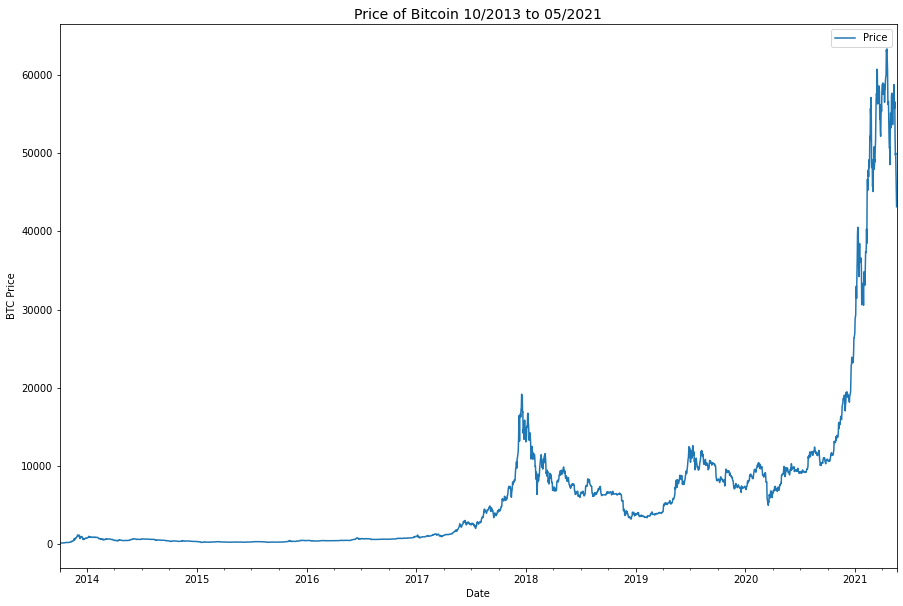

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(15,10))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin 10/2013 to 05/2021", fontsize=14);

## Importing time series data with Pythn's CSV Module

In [9]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #Skips header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # Gets dates as dates
    btc_price.append(float(line[2]))

# View first 10
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

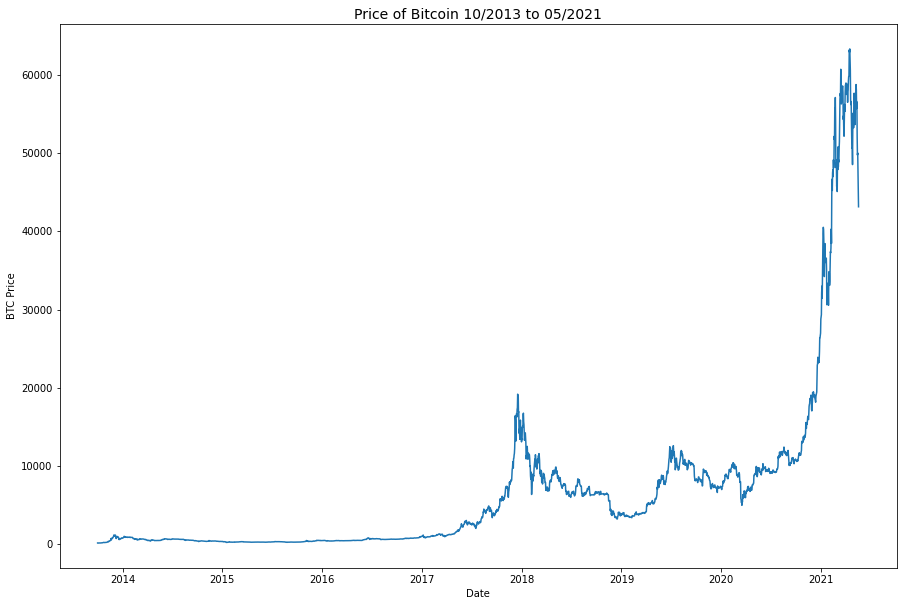

In [10]:
# plot from csv
import numpy as np
plt.figure(figsize=(15,10))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin 10/2013 to 05/2021", fontsize=14);

## Create Train/Test Split 

In [11]:

# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [13]:
# Create train and test splits for time series data
split_size = int(0.8 * len(prices)) 

# Train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

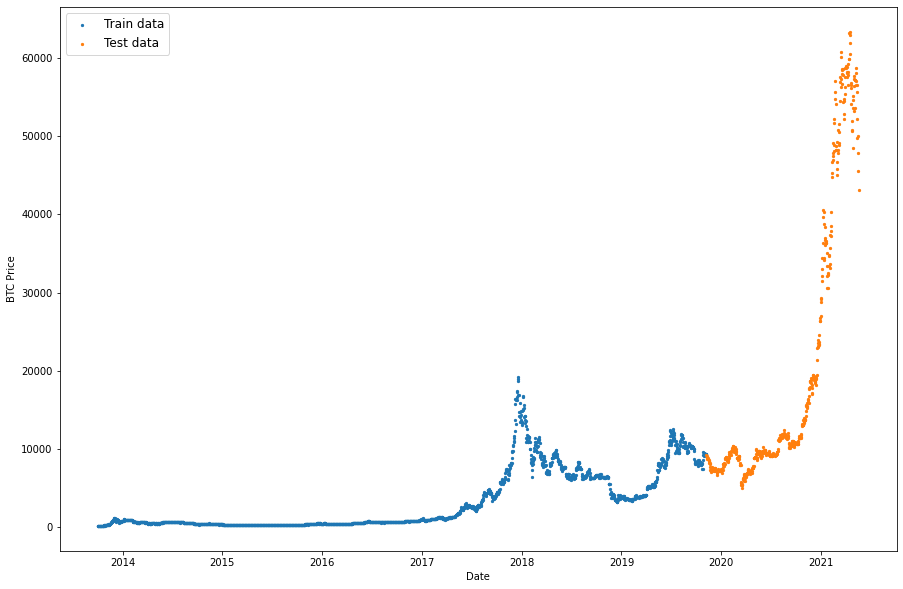

In [14]:
# Plot the splits
plt.figure(figsize=(15,10))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=12)
plt.show();

## Create a plotting function


In [15]:
# Plotting function

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (series of points in times)

  Params
  -------
  timesteps: array of timestep values
  values: array of values across time
  foramt: style of plot defaults scatter
  start: where to start the plot
  end: where to end the plot
  label: label to show plot values
  """
  # Plot series
  # plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid=True

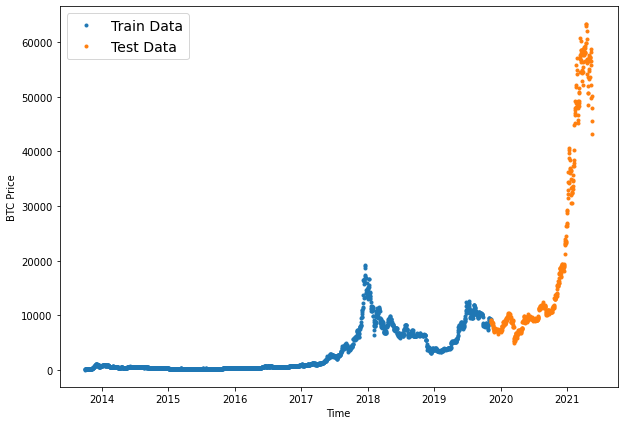

In [16]:
# Test out func
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

## Modelling Experiment

We've got sme BTC historical data for modelling. Time to run a series of modelling experiments to see which performs best

Common terms:
* Horizon = number of timesteps into the future were going to predict
* Window Size = number of timesteps we're going to use to predict horizon

Modeling experiments

Model Number	Model Type	Horizon size	Window size	Extra data
* 0	Naïve model (baseline)
* 1	Dense model	Horizon=1,	Window Size=7	
* 2	Same as Horizon=1, Window Size=30	
* 3	Same as Horizon=1, Window Size=30
* 4	Conv1D	Horizon=1, Window Size=7
* 5	LSTM	Horizon=1,	 Window Size=7	
* 6	Same as 1 (but with multivariate data)	Horizon=1,	Window Size=7	- Extra Data: Block Reward Size
* 7	N-BEATs Algorithm	Horizon=1,	Window Size=7	
* 8	Ensemble (multiple models optimized on different loss functions)	Horizon=1	Window Size=7	
* 9	Future prediction model (model to predict future values)	Horizon=1,	Window Size=7	
* 10	Same as 1 (but with turkey 🦃 data introduced) Horizon=1,	Window Size=7	

## Model 0: Baseline Forecast

In [17]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

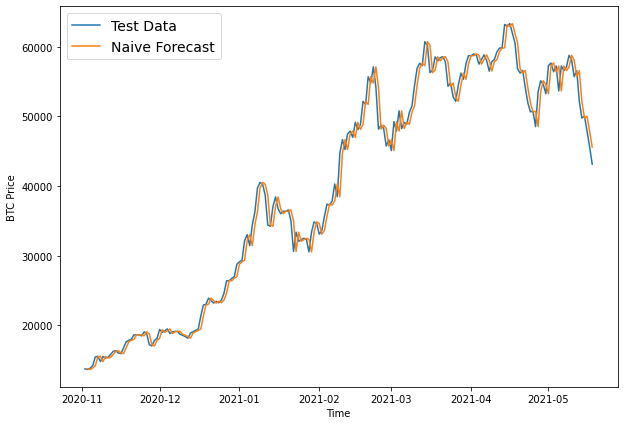

In [18]:
# Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, start=360, format="-", label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=360, format="-", label="Naive Forecast")

## Evaluating a time series model

Looking into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number. So that means it is a regression problem.


Because we're working on a regression problem, we'll  regression metrics.

Regression Metrics:
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**.

The main evaluation we are doing is: *how does our models forecast `(y_pred)` compare against the actual values `(y_true)`


In [19]:
import tensorflow as tf

In [20]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assumes no seasonality)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # Seasonality is 1 day. Reason for the shift of 1

  return mae / mae_naive_no_season

In [21]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [22]:
# Create a function to take in model preds and true values

def evaluate_preds(y_true,y_pred):
  # Make sure float32 for metric calculations
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calc evals
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Format Data Part 2: Windowing Dataset

We window our time series dataset to turn our data into a supervised learning problem

In [24]:
# Global variables
HORIZON = 1
WINDOW_SIZE = 7

In [25]:
# Create function to label windowed data

def get_labeled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset
  """
  return x[:, :-horizon], x[:,-horizon:]


In [26]:
# Test out function
test_window, test_label = get_labeled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} ->, Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] ->, Label: 7


In [27]:
# Create function to view numpy arrays as windows

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D Array into a 2D of sequentially labeled windows of window_size and horizon size labels
  """
  # Create window of specific size (horizon on the end)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # Numpy indexing - 2D Array of multiple window steps minus 1 (zero indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # Index on the target array with 2D array
  windowed_array = x[window_indexes]

  # Get the labelled windows
  windows, labels = get_labeled_window(windowed_array, horizon=horizon)
  return windows, labels
  

In [28]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# View first 3 windows/labels

for i in range(3):
  print(f"Window: {full_windows[i]} -> Horizon: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Horizon: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Horizon: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Horizon: [125.96116]


In [30]:
# View last 3 
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Horizon: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Horizon: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Horizon: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Horizon: [43144.47129086]


## Turning windows into train and test sets

In [31]:
# Train and test splits

def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and horizon (labels) into train and test splits
  """
  split_size = int(len(windows) * (1-test_split)) # Default to 80% train. 20% Test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  
  return train_windows, test_windows, train_labels, test_labels

In [32]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
len(full_windows) * 0.8

2224.0

In [34]:
# Check if train labels are same
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Creating a modelling checkpoint

In [36]:
import os

# Create function to implement ModelCheckpoint callback for specific filenames

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # Monitors val_loss
                                            verbose=0,
                                            save_best_only=True)


## Model 1: Dense Model (window=7, horizon=1)

First simple dense model:

* Single Dense layer (128 hidden units)
* Output layer with linear activation aka no activation
* Adam optimization and MAE loss function
* Batch size of 128
* 100 Epochs - Dataset is smaller than normal, won't affect the learning time as much if the dataset was bigger



In [41]:
import tensorflow as tf
from tensorflow.keras import layers

# Random seed
tf.random.set_seed(42)

# Construct model

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])



Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5828 - val_mae: 2279.5828 - val_mse: 12772095.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285480.9375 - val_loss: 1005.9864 - val_mae: 1005.9864 - val_mse: 3441759.2500
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0312 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4375 - val_loss: 900.5932 - val_mae: 900.5932 - val_mse: 2683713.7500
INFO:tensorflow:Assets written to: model_ex

In [42]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [43]:
# Eval model on test data
# Model that was just tested. Not the best performing 
model_1.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 1ms/step - loss: 662.5322 - mae: 662.5322 - mse: 1358192.1250


[662.5322265625, 662.5322265625, 1358192.125]

In [44]:
# Load in saved best performing model_1

model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.5499 - mae: 568.5499 - mse: 1172587.7500


[568.5498657226562, 568.5498657226562, 1172587.75]